<a href="https://colab.research.google.com/github/Floccinaucinibilipilification/Data-Lit/blob/master/Data_Lit_1_6_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Before we start

In [0]:
!pip install pandas
!pip install tweepy
!pip install twython
!pip install vaderSentiment

  Stored in directory: /root/.cache/pip/wheels/c2/b0/a3/5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython
    100% |████████████████████████████████| 133kB 6.3MB/s 


In [0]:
import nltk
import time
import tweepy
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline
sns.set_style("whitegrid")
nltk.download('vader_lexicon')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Twitter API Setup

In [0]:
consumer_key = 'your consumer key'
consumer_secret = 'your consumer secret'
access_token = 'your access_token'
access_token_secret = 'your access token secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Fetch tweets and Visualize the sentiment

In [0]:
def twitter_sentiment(topic, count=100, disp_head=False):
  consumer_key = 'LDPoU1ZpTGun41XFMnJ0wzY4o'
  consumer_secret = 'qeGUeocix7T7KgiKTCHTqXBV6aSEiqOdy9cPufQDcHD3W9JX7X'
  access_token = '3279230352-Ksr1WOTv7uSbiQiJy0Wa9JyecMbkyuwhfvj88sz'
  access_token_secret = 'wSJDlVvAQTN3Kx7Nr7d8RitBED3xt9qKlL9NuCcAnb6os'

  auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_token, access_token_secret)
  api = tweepy.API(auth)

  tweets = api.search(topic,count=count) # count: Default 15, maximum 100

  data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

  #display(data.head(10))
  
  #print(tweets[0].created_at)

  sid = SentimentIntensityAnalyzer()

  listy = []

  for index, row in data.iterrows():
      ss = sid.polarity_scores(row["Tweets"])
      listy.append(ss)

  se = pd.Series(listy)

  data['polarity'] = se.values

  data['negative'] = pd.Series([x['neg'] for x in data.polarity])
  data['neutral'] = pd.Series([x['neu'] for x in data.polarity])
  data['positive'] = pd.Series([x['pos'] for x in data.polarity])
  data['compound'] = pd.Series([x['compound'] for x in data.polarity])

  data_partial = data[['negative','neutral','positive','compound']]
  data['sentiment'] = data_partial.idxmax(axis=1)
  
  if disp_head:
    display(data.head(6))
  
  plt.figure(figsize=(8,6))
  sns.countplot(data.sentiment, orient="h", palette='coolwarm', saturation=0.75)
  plt.title('Sentiment of ' + str(count) + ' Tweets about ' + topic)

#### Data Science

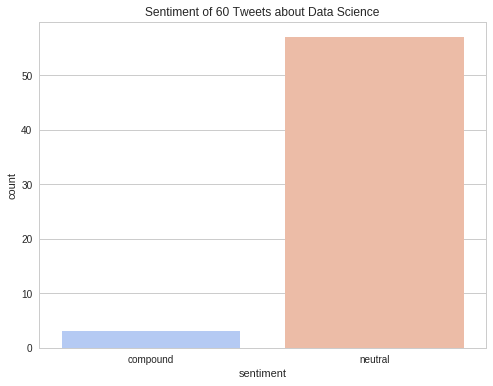

In [0]:
twitter_sentiment('Data Science',60)

#### Artificial Intelligence

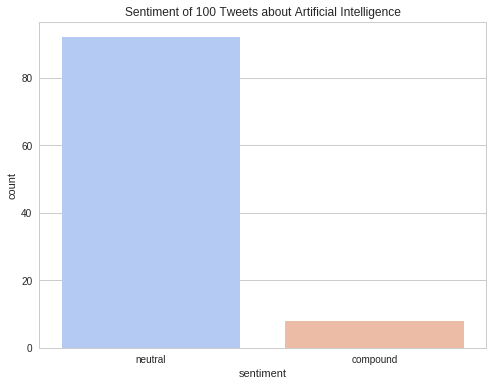

In [0]:
twitter_sentiment('Artificial Intelligence')

#### LGBT

,Tweets,polarity,negative,neutral,positive,compound,sentiment
0,RT @isabelIefacts: who is the bigger lgbt arti...,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.000,0.857,0.143,0.3612,neutral
1,RT @isabelIefacts: who is the bigger lgbt arti...,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.000,0.857,0.143,0.3612,neutral
2,@NOSTALGIAHURTS You say faggot. It’s not your ...,"{'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'comp...",0.173,0.827,0.000,-0.6597,neutral
3,RT @isabelIefacts: who is the bigger lgbt arti...,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.000,0.857,0.143,0.3612,neutral
4,RT @BlogBurari: 桜田大臣の「がっかり」発言、昨年の杉田水脈議員の「LGBTは...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
5,"Your church is basically a cult, Crispy. And t...","{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",0.252,0.748,0.000,-0.5719,neutral


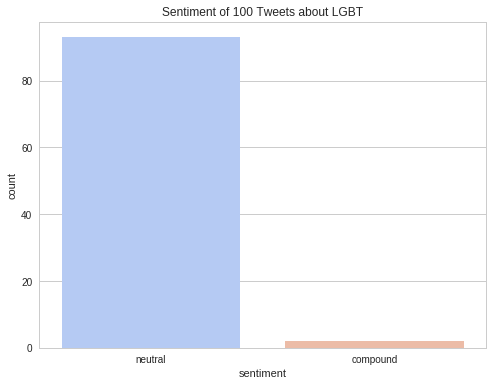

In [0]:
twitter_sentiment('LGBT', disp_head=True)

### For large amount of tweets

In [0]:
def mul_tweets(topic, count=100, n=100, disp_head=False):
  
  tweets = api.search(topic, count=count)

  data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

  print(time.ctime())

  for i in range(n-1):

    time.sleep(60)

    tweets = api.search('Artificial Intelligence', count=count)

    dataf = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

    data = pd.concat([data, dataf], ignore_index=True)

    if i % 10 == 0:
      print(round(100*i/n,2),'% finished')
  
  print(time.ctime())
  
  sid = SentimentIntensityAnalyzer()

  listy = []

  for index, row in data.iterrows():
      ss = sid.polarity_scores(row["Tweets"])
      listy.append(ss)

  se = pd.Series(listy)

  data['polarity'] = se.values

  data['negative'] = pd.Series([x['neg'] for x in data.polarity])
  data['neutral'] = pd.Series([x['neu'] for x in data.polarity])
  data['positive'] = pd.Series([x['pos'] for x in data.polarity])
  data['compound'] = pd.Series([x['compound'] for x in data.polarity])

  data_partial = data[['negative','neutral','positive','compound']]
  data['sentiment'] = data_partial.idxmax(axis=1)
  
  if disp_head:
    display(data.info())
    display(data.head(6))
  
  plt.figure(figsize=(8,6))
  sns.countplot(data.sentiment, orient="h", palette='Set2', saturation=0.75)
  plt.title('Sentiment of Tweets about ' + topic)
  
  return data

#### Data Science

Wed Feb 13 01:08:38 2019
0.0 % finished
10.0 % finished
20.0 % finished
30.0 % finished
40.0 % finished
50.0 % finished
60.0 % finished
70.0 % finished
80.0 % finished
90.0 % finished
Wed Feb 13 02:48:25 2019


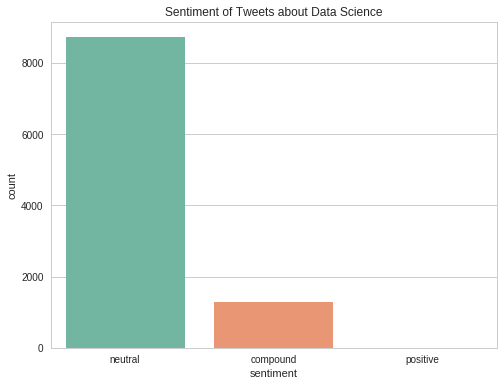

In [0]:
ds = mul_tweets(topic='Data Science')

In [0]:
ds.Tweets.value_counts().head(10)

RT @WhiteHouse: Yesterday, President Trump launched a strategy for American leadership in artificial intelligence. “We will win the race fo…    326
RT @NatGeo: AI already pervades our world, but its current capacities are far from what you see in any science fiction movie https://t.co/O…    323
RT @sciam: The European Commission has selected six research projects—in areas from health and energy to artificial intelligence and cultur…    147
RT @business: The big stock-market winners in China’s technology hub of Shenzhen aren’t artificial intelligence and semiconductor companies…    131
RT @WhiteHouse: President @realDonaldTrump is establishing American leadership, promoting innovation, and developing our workforce on the A…    127
RT @AnimalsPostt: https://t.co/mBN6YjkP70                                                                                                       108
RT @Medium: There's a loophole in the third law of artificial intelligence, George Dyson writes https://t.co/X1K

In [0]:
unique_data = ds.drop_duplicates('Tweets')

Text(0.5, 1.0, 'Sentiment of Tweets about Data Science')

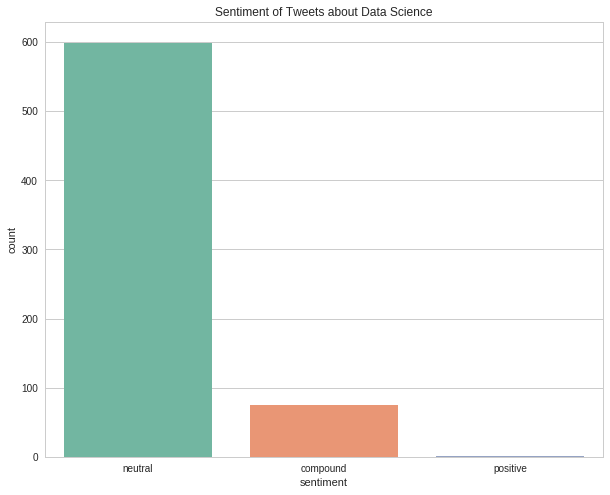

In [0]:
# Unique data - Not much difference
topic='Data Science'
plt.figure(figsize=(10,8))
sns.countplot(unique_data.sentiment, orient="h", palette='Set2', saturation=0.75)
plt.title('Sentiment of Tweets about ' + topic)

#### Artificial Intelligence

Wed Feb 13 02:57:36 2019
0.0 % finished
10.0 % finished
20.0 % finished
30.0 % finished
40.0 % finished
50.0 % finished
60.0 % finished
70.0 % finished
80.0 % finished
90.0 % finished
Wed Feb 13 04:37:24 2019


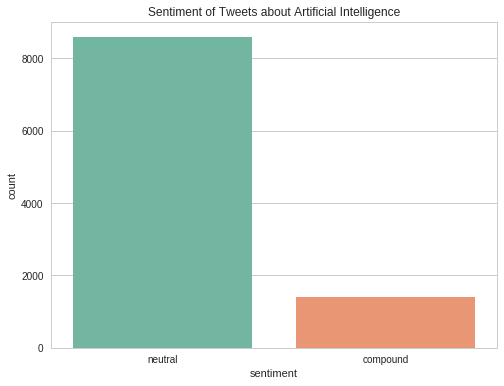

In [0]:
ai = mul_tweets(topic='Artificial Intelligence')

In [0]:
ai.Tweets.value_counts().head(10)

RT @WhiteHouse: Yesterday, President Trump launched a strategy for American leadership in artificial intelligence. “We will win the race fo…      412
RT @ajplus: Can algorithms built into artificial intelligence reveal racism and sexism?\n\nData scientists say yes — and we're to blame. http…    333
RT @business: The big stock-market winners in China’s technology hub of Shenzhen aren’t artificial intelligence and semiconductor companies…      310
RT @WhiteHouse: President @realDonaldTrump is establishing American leadership, promoting innovation, and developing our workforce on the A…      246
RT @WhiteHouse: "We must ensure that advances in AI remain fueled by American ingenuity, reflect American values, and are applied for the b…      237
RT @uchi2chi1: Investing in #AI is crucial to creating the industries of the future! 👏⁦@realDonaldTrump⁩ #MAGA every damn day😁 \n\nPresident…     175
RT @1st_relationn: https://t.co/YyJdiAlgI5                                                          

### That's all! Hooray!